# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Training and Testing Data

In [2]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Data Preprocessing

In [4]:
# Drop unnecessary columns
train_data = train_data.drop(['Unnamed: 0'], axis=1)
test_data = test_data.drop(['Unnamed: 0'], axis=1)

In [5]:
# Convert date features to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

In [7]:
from sklearn.preprocessing import LabelEncoder

# Select a random subset (adjust the fraction as needed)
train_data_subset = train_data.sample(frac=0.1, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features for the subset
for column in ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']:
    train_data_subset[column] = label_encoder.fit_transform(train_data_subset[column])

# Now train_data_subset contains label-encoded categorical columns

In [8]:
# Separate features and target variable for the subset
X_subset = train_data_subset.drop('is_fraud', axis=1)
y_subset = train_data_subset['is_fraud']

In [9]:
# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [11]:
# Exclude datetime columns from standardization
datetime_columns = ['trans_date_trans_time', 'dob']
X_train_subset_no_datetime = X_train_subset.drop(columns=datetime_columns)
X_test_subset_no_datetime = X_test_subset.drop(columns=datetime_columns)

# Standardize the features for the subset excluding datetime columns
scaler_subset = StandardScaler()
X_train_scaled_subset = scaler_subset.fit_transform(X_train_subset_no_datetime)
X_test_scaled_subset = scaler_subset.transform(X_test_subset_no_datetime)

# Training the Model

In [12]:
# Create a Random Forest model for the subset
rf_model_subset = RandomForestClassifier(random_state=42)

# Train the model on the training data for the subset
rf_model_subset.fit(X_train_scaled_subset, y_train_subset)

# Make predictions on the test data for the subset
y_pred_rf_subset = rf_model_subset.predict(X_test_scaled_subset)

# Evaluate the model for the subset
print("Random Forest Results for the Subset:")
print("Accuracy:", accuracy_score(y_test_subset, y_pred_rf_subset))
print("Confusion Matrix:\n", confusion_matrix(y_test_subset, y_pred_rf_subset))
print("Classification Report:\n", classification_report(y_test_subset, y_pred_rf_subset))

Random Forest Results for the Subset:
Accuracy: 0.9961054985733014
Confusion Matrix:
 [[25759    13]
 [   88    74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25772
           1       0.85      0.46      0.59       162

    accuracy                           1.00     25934
   macro avg       0.92      0.73      0.80     25934
weighted avg       1.00      1.00      1.00     25934



# Interpret the Results

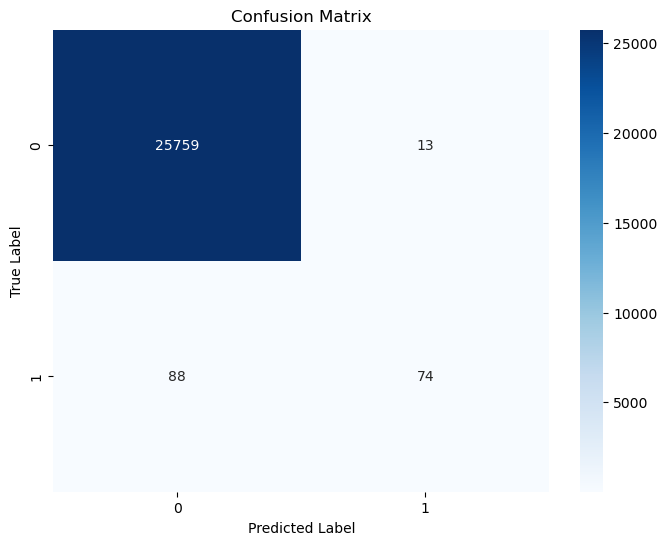

In [14]:
# Create a heatmap with color bar
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()